# Дипломная работа "Анализ эмоциальной окраски текста"

In [1]:
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Задача 2 "Russian Troll Tweets - 3 million tweets from accounts associated with the 'Internet Research Agency'"

Эти данные были использованы в материале FiveThirtyEight « Почему мы делимся 3 миллионами твитов русских троллей» .

Этот каталог содержит данные почти о 3 миллионах твитов, отправленных пользователями Твиттера, связанными с Агентством интернет-исследований, российской «фабрикой троллей» и фигурантом обвинительного заключения, выдвинутого Министерством юстиции в феврале 2018 года в рамках расследования спецпрокурора Роберта Мюллера по России. Твиты в этой базе данных были отправлены в период с февраля 2012 года по май 2018 года, причем подавляющее большинство из них было опубликовано с 2015 по 2017 год.

FiveThirtyEight получили данные от исследователей Университета Клемсона Даррена Линвилла , адъюнкт-профессора коммуникаций, и Патрика Уоррена , адъюнкт-профессора экономики, 25 июля 2018 года. Они собрали данные с помощью пользовательского поиска в инструменте Social Studio, принадлежащем Salesforce. и заключен контракт на использование Центром прослушивания социальных сетей Клемсона .

Основой для идентификаторов Twitter, включенных в эти данные, являются списки идентификаторов, связанных с Агентством интернет-исследований , за ноябрь 2017 г. и июнь 2018 г., которые Twitter предоставил Конгрессу. Этот набор данных содержит каждый твит, отправленный каждым из 2752 дескрипторов в списке за ноябрь 2017 г. с 10 мая 2015 г. Для 946 дескрипторов, недавно добавленных в список за июнь 2018 г., эти данные содержат каждый твит с 19 июня 2015 г. дескрипторы, данные распространяются даже раньше, чем эти диапазоны.Некоторые из перечисленных дескрипторов не писали в Твиттере во время этих диапазонов.) Исследователи полагают, что это включает в себя подавляющее большинство активности этих дескрипторов. Исследователи также удалили 19 псевдонимов, которые остались в списке на июнь 2018 года, но которые, по их мнению, вряд ли были троллями ИРА.

Всего девять CSV-файлов содержат 2 973 371 твит от 2 848 дескрипторов Twitter. Кроме того, как всегда, предостережение: в данном случае читатель твитов должен быть осторожен: в дополнение к собственному контенту некоторые твиты содержат активные ссылки, которые могут вести на контент для взрослых или что-то похуже.

Исследователи Клемсона использовали эти данные в рабочем документе «Фабрики троллей: Агентство интернет-исследований и создание программы, спонсируемой государством» , которая в настоящее время находится на рассмотрении в академическом журнале. Анализ авторов в этой статье был выполнен на основе файла данных, представленного здесь, с ограничением окна дат с 19 июня 2015 г. по 31 декабря 2017 г.

Файлы имеют следующие столбцы:



Header | Definition
---|---------
`external_author_id` | An author account ID from Twitter 
`author` | The handle sending the tweet
`content` | The text of the tweet
`region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?   id=000199367&type=1)
`language` | The language of the tweet
`publish_date` | The date and time the tweet was sent
`harvested_date` | The date and time the tweet was collected by Social Studio
`following` | The number of accounts the handle was following at the time of the tweet
`followers` | The number of followers the handle had at the time of the tweet
`updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
`post_type` | Indicates if the tweet was a retweet or a quote-tweet
`account_type` | Specific account theme, as coded by Linvill and Warren
`retweet` | A binary indicator of whether or not the tweet is a retweet
`account_category` | General account theme, as coded by Linvill and Warren
`new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

import re
import string 
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english'))
NOISE_WORDS = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

import transformers as ppb
import torch

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import pymorphy2

from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import accuracy_score

# Загрузка данных

In [5]:
import os
print(os.getcwd())

C:\Netology\DIPLOMA


In [6]:
os.chdir('C:/Netology/DIPLOMA/data/trolls')

In [7]:
print(os.getcwd())

C:\Netology\DIPLOMA\data\trolls


In [7]:
# for entry in os.listdir('../input/russian-troll-tweets'): 
#     print(entry)

In [8]:
# files = os.listdir()
# data_total = pd.read_csv(files[0])
# data_total.head()

In [9]:

# for num_entry in range(1, len(files)):
#     data_1 = pd.read_csv(files[num_entry])
#     data_total = pd.concat([data_total, data_1])

In [10]:
frames = []
for dirname, _, filenames in os.walk('C:/Netology/DIPLOMA/data/trolls'):
    for filename in filenames:
        print('Loading', os.path.join(dirname, filename))
        frames.append(pd.read_csv(os.path.join(dirname, filename)))
df = pd.concat(frames)
df = df.sample(frac=1).reset_index(drop=True)

Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_1.csv
Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_2.csv
Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_3.csv
Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_4.csv
Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_5.csv
Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_6.csv
Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_7.csv
Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_8.csv
Loading C:/Netology/DIPLOMA/data/trolls\IRAhandle_tweets_9.csv


In [11]:
data_total = df.copy()

# Анализ данных

In [12]:
data_total.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.625965e+09,MEGGIEONEIL,"#WithoutYouIam a movie quoting dork, sitting i...",United States,English,6/29/2016 14:59,6/29/2016 14:59,1153,690,1313,RETWEET,Hashtager,0,1,HashtagGamer
1,7.530000e+17,RALFREIMANN8891,Bei 11:11 im 5. Satz vom Herren-Doppelfinale M...,United States,German,7/16/2017 8:57,7/16/2017 8:57,101,96,84,RETWEET,German,0,1,NonEnglish
2,2.533002e+09,JASPER_FLY,"#TheTroubleWithAddiction is that #kratom, a pl...",United States,English,9/12/2016 10:59,9/12/2016 10:59,1549,1393,2888,NaN,Hashtager,0,0,HashtagGamer
3,4.444331e+09,GLOBALFOE,President Kenyatta opens WTO conference with a...,Unknown,English,12/15/2015 23:25,12/15/2015 23:25,382,51,32,NaN,left,0,0,LeftTroll
4,3.272641e+09,EXQUOTE,.@shazleenazmi shark @BronsonMBrown Bronson @N...,United States,English,8/27/2015 7:34,8/27/2015 7:34,2,762,56571,NaN,Commercial,1,0,Commercial


In [13]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973371 entries, 0 to 2973370
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   external_author_id  float64
 1   author              object 
 2   content             object 
 3   region              object 
 4   language            object 
 5   publish_date        object 
 6   harvested_date      object 
 7   following           int64  
 8   followers           int64  
 9   updates             int64  
 10  post_type           object 
 11  account_type        object 
 12  new_june_2018       int64  
 13  retweet             int64  
 14  account_category    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 340.3+ MB


In [14]:
data_total['account_category'].unique()

array(['HashtagGamer', 'NonEnglish', 'LeftTroll', 'Commercial',
       'NewsFeed', 'RightTroll', 'Fearmonger', 'Unknown'], dtype=object)

In [15]:
data_total.groupby('account_category').count()[['author']]

,author
account_category,
Commercial,122582
Fearmonger,11140
HashtagGamer,241827
LeftTroll,427811
NewsFeed,599294
NonEnglish,837725
RightTroll,719087
Unknown,13905


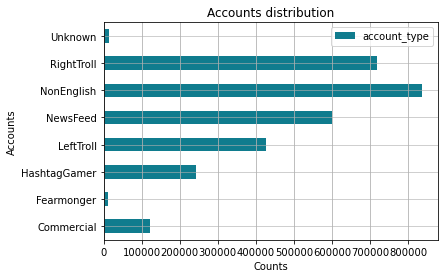

In [16]:
plot_3 = data_total.groupby('account_category').count()[['account_type']]

plot_3.plot(kind='barh', grid = True,
                   color='#107c8e')
plt.title('Accounts distribution')
plt.xlabel('Counts')
plt.ylabel('Accounts')
plt.grid(axis='y', alpha=0.75)

In [17]:
data_total.groupby('language').count()[['author']].sort_values('author', ascending=False)

,author
language,
English,2128963
Russian,624124
German,87171
Ukrainian,39361
Italian,18254
Serbian,9615
Uzbek,9491
Bulgarian,9458
LANGUAGE UNDEFINED,8325


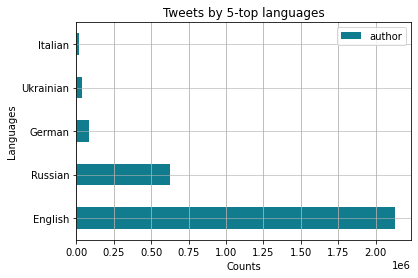

In [18]:
plot_4 = data_total.groupby('language').count()[['author']].sort_values('author', ascending=False).head(5)

plot_4.plot(kind='barh', grid = True,
                   color='#107c8e')
plt.title('Tweets by 5-top languages')
plt.xlabel('Counts')
plt.ylabel('Languages')
plt.grid(axis='y', alpha=0.75)

In [19]:
data_total[data_total['account_category'] == 'Commercial'].head(2)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
4,3.272641e+09,EXQUOTE,.@shazleenazmi shark @BronsonMBrown Bronson @N...,United States,English,8/27/2015 7:34,8/27/2015 7:34,2,762,56571,NaN,Commercial,1,0,Commercial
5,3.272641e+09,EXQUOTE,http://t.co/gjvkc3Oi8z Just got back from POUN...,United States,English,7/30/2015 0:50,7/30/2015 0:50,2,338,24877,NaN,Commercial,1,0,Commercial


In [20]:
data_total[data_total['account_category'] == 'Commercial']['content'].iloc[0]

'.@shazleenazmi shark @BronsonMBrown Bronson @Niike___ Drippin @ReignDolfy Shai @jasmina_xxo Jasmemea http://t.co/TcSGYAcvdn'

In [21]:
data_total[data_total['language'] == 'Russian']['content'].iloc[0]

'Владивостокские гаишники и их служебный Chevrolet Caprice, 1990-е. https://t.co/5jKu53pgYR'

# Обработка/подготовка данных - preprocessing

In [22]:
langs = data_total.language.unique()
print(langs)

['English' 'German' 'Russian' 'Italian' 'Bulgarian' 'Kurdish' 'Ukrainian'
 'Arabic' 'French' 'Uzbek' 'LANGUAGE UNDEFINED' 'Vietnamese' 'Serbian'
 'Swedish' 'Spanish' 'Farsi (Persian)' 'Croatian' 'Norwegian' 'Macedonian'
 'Romanian' 'Estonian' 'Albanian' 'Catalan' 'Portuguese' 'Dutch' 'Turkish'
 'Hungarian' 'Icelandic' 'Czech' 'Japanese' 'Tagalog (Filipino)' 'Finnish'
 'Somali' 'Danish' 'Polish' 'Hebrew' 'Latvian' 'Lithuanian' 'Slovak'
 'Indonesian' 'Malay' 'Pushto' 'Hindi' 'Gujarati' 'Thai' 'Urdu' 'Greek'
 'Korean' 'Slovenian' 'Simplified Chinese' 'Bengali' 'Malayalam'
 'Traditional Chinese' 'Telugu' 'Tamil' 'Kannada']


In [23]:
NOISE_WORDS_2 = []
for i in langs:
    try:
        print(i, '------>>', stopwords.words(i), '\n')
        NOISE_WORDS_2 += stopwords.words(i)
    except:
        continue

English ------>> ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same'

In [24]:
# !pip install pymorphy2
# !wget -O pymorphy2-dicts-ru.tar.gz https://files.pythonhosted.org/packages/b2/b4/732ff6eeac8c9ea22e7e1c7a321b21b6f3ba19d5e0a8925f35da9c8ebbb2/pymorphy2-dicts-ru-2.4.404381.4453942.tar.gz

In [24]:
m = pymorphy2.MorphAnalyzer()
def lemmatize(text, mystem=m):
    try:
        return ' '.join((m.parse(t)[0].normal_form for t in text.split(' ')))
    except:
        return " "

In [25]:
def clean_text_2(text, lemmatize, noise_wrods_2):
    '''Функция на вход получает текст, на выходе выдаёт очищенный текст'''
    text = str(text).lower() # первый шаг - все тексты приводим к нижнему регистру 
    
    text = re.sub("@[\w'._+-:]+", '', text) # второй шаг - убираем ники пользователей твитера, т.к. обычно не несут никакой окраски
    text = re.sub('https?://\S+|www\.\S+', '', text) # третий шаг - убираем ссылки в твитах, т.к. названия ссылок  обычно не влияют на тональность 
    text = re.sub('\w*\d\w*', '', text) # четвёртый шаг - убираем "слова", внутри которых есть цифры

    text = re.sub('[^\w\s^.]','', text) # пятый шаг - убираем знаки пунктуации
    text = re.sub('[_.]+',' ', text)
    
  #стоп-слова  не всех языков  
    text = " ".join([word for word in text.split(' ') if word not in noise_wrods_2]) # шестой шаг - отбираем только НЕстоп-слова
    
    text = lemmatize(text) # седьмой шаг - лемматизация при помощи spacy 
    text = re.sub('[\s]+', ' ', text) # восьмой шаг - заменяем любой пробельный символ(табуляция, конец строки и т.п.) на пробел

    return text

In [26]:
data_total_2 = data_total.copy()

In [27]:
data_total_2['content'] = data_total_2['content'].apply(lambda x: clean_text_2(x, lemmatize, NOISE_WORDS_2))

### LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
data_total_2['account_category'] = le.fit_transform(data_total_2['account_category'])

In [30]:
data_total_2.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.625965e+09,MEGGIEONEIL,withoutyouiam movie quoting dork sitting corne...,United States,English,6/29/2016 14:59,6/29/2016 14:59,1153,690,1313,RETWEET,Hashtager,0,1,2
1,7.530000e+17,RALFREIMANN8891,satz herrendoppelfinale melokubot vs marachpa...,United States,German,7/16/2017 8:57,7/16/2017 8:57,101,96,84,RETWEET,German,0,1,5
2,2.533002e+09,JASPER_FLY,thetroublewithaddiction kratom plant helps man...,United States,English,9/12/2016 10:59,9/12/2016 10:59,1549,1393,2888,NaN,Hashtager,0,0,2
3,4.444331e+09,GLOBALFOE,president kenyatta opens wto conference call t...,Unknown,English,12/15/2015 23:25,12/15/2015 23:25,382,51,32,NaN,left,0,0,3
4,3.272641e+09,EXQUOTE,shark bronson drippin shai jasmemea,United States,English,8/27/2015 7:34,8/27/2015 7:34,2,762,56571,NaN,Commercial,1,0,0


In [31]:
data_total_2['account_category'].unique()

array([2, 5, 3, 0, 4, 6, 1, 7])

In [32]:
for num in [7, 6, 5, 4, 3, 2, 1, 0]:
    print(num, '---->>', le.inverse_transform([num]))

7 ---->> ['Unknown']
6 ---->> ['RightTroll']
5 ---->> ['NonEnglish']
4 ---->> ['NewsFeed']
3 ---->> ['LeftTroll']
2 ---->> ['HashtagGamer']
1 ---->> ['Fearmonger']
0 ---->> ['Commercial']


In [33]:
data_total_3 = data_total_2.copy()

In [16]:
# data_total_3.to_csv('data_total_3.csv')

## Загрузка подготовленных данных

In [4]:
# data_total_3 = pd.read_csv('C:/Netology/DIPLOMA/data/trolls/data_total_3.csv', encoding='utf-8')

In [70]:
data_total_4_Russian = data_total_3[data_total_3['language'] == 'Russian']
data_total_4_English = data_total_3[data_total_3['language'] == 'English']

### Работа с английским твитами

In [71]:
data_total_4_English.head(2)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.625965e+09,MEGGIEONEIL,withoutyouiam movie quoting dork sitting corne...,United States,English,6/29/2016 14:59,6/29/2016 14:59,1153,690,1313,RETWEET,Hashtager,0,1,2
2,2.533002e+09,JASPER_FLY,thetroublewithaddiction kratom plant helps man...,United States,English,9/12/2016 10:59,9/12/2016 10:59,1549,1393,2888,NaN,Hashtager,0,0,2


In [72]:
data_total_4_English.shape

(2128963, 15)

In [73]:
data_total_4_English = data_total_4_English.sample(1000000)

In [74]:
data_total_4_English.shape

(1000000, 15)

In [75]:
# data_total_4_Russian.head(2)

In [76]:
# data_total_4_Russian.shape

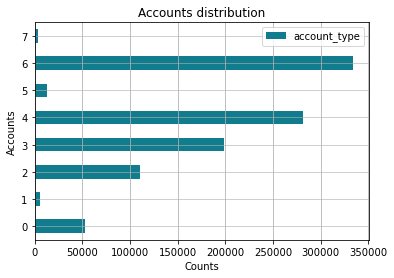

In [77]:
plot_3_1 = data_total_4_English.groupby('account_category').count()[['account_type']]

plot_3_1.plot(kind='barh', grid = True,
                   color='#107c8e')
plt.title('Accounts distribution')
plt.xlabel('Counts')
plt.ylabel('Accounts')
plt.grid(axis='y', alpha=0.75)

In [78]:
X_train_E_2, X_test_E_2, y_train_E_2, y_test_E_2 = train_test_split(data_total_4_English['content'].values.astype('U'), data_total_4_English['account_category'] , test_size = 0.2)

In [28]:
# X_train_R_2, X_test_R_2, y_train_R_2, y_test_R_2 = train_test_split(data_total_4_Russian['content'].values.astype('U'), data_total_4_Russian['account_category'] , test_size = 0.2)

## Первый способ - LogisticRegression + CountVectorizer на Russian & English

In [79]:
vec_2 = CountVectorizer(ngram_range=(1, 1))
vec_2.fit(data_total_4_English['content'].values.astype('U'))
bow_2 = vec_2.transform(X_train_E_2)

In [80]:
clf_2_1 = LogisticRegression(random_state=42, solver='liblinear', 
                             class_weight = 'balanced')
clf_2_1.fit(bow_2, y_train_E_2)
pred_2_1 = clf_2_1.predict(vec_2.transform(X_test_E_2))
print(classification_report(pred_2_1, y_test_E_2))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10628
           1       0.68      0.28      0.40      2544
           2       0.83      0.80      0.81     22712
           3       0.67      0.69      0.68     38740
           4       0.88      0.86      0.87     57489
           5       0.59      0.29      0.39      5420
           6       0.72      0.83      0.77     58206
           7       0.25      0.04      0.07      4261

    accuracy                           0.78    200000
   macro avg       0.69      0.59      0.62    200000
weighted avg       0.77      0.78      0.77    200000



## Второй способ - TF-IDF + LogisticRegression

In [81]:
pipe_2_2 = Pipeline([
                ('tf-idf', TfidfVectorizer()),
                ('LogReg', LogisticRegression(random_state=42, 
                                              solver='liblinear',
                                              class_weight = 'balanced'))
                ])

In [82]:
pipe_2_2.fit(X_train_E_2, y_train_E_2)
y_pred_2_2 = pipe_2_2.predict(X_test_E_2)
print(classification_report(y_pred_2_2, y_test_E_2))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10927
           1       0.68      0.29      0.41      2464
           2       0.81      0.85      0.83     20844
           3       0.67      0.67      0.67     39872
           4       0.88      0.85      0.87     58209
           5       0.60      0.27      0.38      5995
           6       0.71      0.83      0.76     57654
           7       0.25      0.04      0.07      4035

    accuracy                           0.77    200000
   macro avg       0.70      0.59      0.62    200000
weighted avg       0.76      0.77      0.76    200000



## Третий способ - CountVectorizer + XGBClassifier на Russian & English

In [83]:
pipe5_2 = Pipeline([
                ('CountVectChar', CountVectorizer(ngram_range=(1, 1))),
                ('XGB', XGBClassifier(objective = 'multi:softprob' , 
                                      use_label_encoder=False, 
                                      eval_metric='mlogloss')) 
                 ])

In [84]:
pipe5_2.fit(X_train_E_2, y_train_E_2)
y_pred5_2 = pipe5_2.predict(X_test_E_2)
print(classification_report(y_pred5_2, y_test_E_2))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      8531
           1       0.50      0.82      0.62       643
           2       0.57      0.98      0.72     12713
           3       0.42      0.71      0.53     23654
           4       0.76      0.84      0.80     51063
           5       0.17      0.85      0.28       537
           6       0.86      0.56      0.68    102833
           7       0.03      0.65      0.05        26

    accuracy                           0.70    200000
   macro avg       0.51      0.79      0.57    200000
weighted avg       0.76      0.70      0.70    200000



## Четвёртый способ - TfidfVectorizer + XGBClassifier на Russian & English

In [85]:
pipe6_2 = Pipeline([
                ('tf-idf', TfidfVectorizer()),
                ('XGB', XGBClassifier(objective = 'multi:softprob' , 
                                      use_label_encoder=False, 
                                      eval_metric='mlogloss')) 
                 ])
pipe6_2.fit(X_train_E_2, y_train_E_2)
y_pred6_2 = pipe6_2.predict(X_test_E_2)
print(classification_report(y_pred6_2, y_test_E_2))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      8498
           1       0.49      0.81      0.61       646
           2       0.57      0.99      0.72     12718
           3       0.42      0.72      0.53     23034
           4       0.77      0.84      0.80     51026
           5       0.18      0.80      0.29       600
           6       0.87      0.56      0.68    103444
           7       0.03      0.56      0.05        34

    accuracy                           0.70    200000
   macro avg       0.51      0.78      0.57    200000
weighted avg       0.76      0.70      0.70    200000



## Пятый способ - CountVectorizer + CatBoostClassifier на Russian & English

In [86]:
pipe7_2 = Pipeline([
                ('CountVectChar', CountVectorizer(ngram_range=(1, 1))),
                ('CBC', CatBoostClassifier( learning_rate=1, depth=2, 
                                           loss_function='MultiClass')) 
                 ])
pipe7_2.fit(X_train_E_2, y_train_E_2)
y_pred7_2 = pipe7_2.predict(X_test_E_2)
print(classification_report(y_pred7_2, y_test_E_2))

0:	learn: 1.5446594	total: 2.5s	remaining: 41m 41s
1:	learn: 1.4258906	total: 4.96s	remaining: 41m 14s
2:	learn: 1.3846338	total: 7.24s	remaining: 40m 6s
3:	learn: 1.3597133	total: 9.5s	remaining: 39m 25s
4:	learn: 3.0072220	total: 11.8s	remaining: 39m 17s
5:	learn: 353.0927956	total: 14.3s	remaining: 39m 24s
6:	learn: 353.0791827	total: 16.5s	remaining: 39m 4s
7:	learn: 291.6536414	total: 18.8s	remaining: 38m 57s
8:	learn: 224.0850581	total: 21.1s	remaining: 38m 39s
9:	learn: 158.3036575	total: 23.5s	remaining: 38m 47s
10:	learn: 157.1753277	total: 25.9s	remaining: 38m 52s
11:	learn: 298.5626949	total: 28.4s	remaining: 38m 54s
12:	learn: 250.7021398	total: 30.7s	remaining: 38m 53s
13:	learn: 183.0818918	total: 33.3s	remaining: 39m 3s
14:	learn: 135.2294133	total: 35.7s	remaining: 39m 5s
15:	learn: 87.3769425	total: 38.1s	remaining: 39m 2s
16:	learn: 325.1135107	total: 40.5s	remaining: 39m 3s
17:	learn: 309.2021268	total: 43s	remaining: 39m 4s
18:	learn: 261.2991309	total: 45.6s	remain

148:	learn: 100.6359219	total: 6m 18s	remaining: 36m
149:	learn: 78.8299704	total: 6m 20s	remaining: 35m 57s
150:	learn: 209.9828639	total: 6m 23s	remaining: 35m 55s
151:	learn: 189.0187354	total: 6m 25s	remaining: 35m 53s
152:	learn: 166.8029866	total: 6m 28s	remaining: 35m 50s
153:	learn: 144.9479795	total: 6m 31s	remaining: 35m 48s
154:	learn: 123.1220274	total: 6m 33s	remaining: 35m 46s
155:	learn: 101.2846117	total: 6m 36s	remaining: 35m 45s
156:	learn: 91.2775202	total: 6m 39s	remaining: 35m 42s
157:	learn: 262.9267518	total: 6m 42s	remaining: 35m 42s
158:	learn: 229.9308785	total: 6m 44s	remaining: 35m 40s
159:	learn: 205.3819154	total: 6m 47s	remaining: 35m 37s
160:	learn: 181.9587437	total: 6m 49s	remaining: 35m 35s
161:	learn: 158.9886449	total: 6m 52s	remaining: 35m 33s
162:	learn: 136.0979257	total: 6m 55s	remaining: 35m 31s
163:	learn: 113.2125224	total: 6m 57s	remaining: 35m 28s
164:	learn: 90.3271191	total: 7m	remaining: 35m 26s
165:	learn: 129.5900999	total: 7m 2s	remai

293:	learn: 86.8800939	total: 12m 48s	remaining: 30m 44s
294:	learn: 200.6790582	total: 12m 50s	remaining: 30m 41s
295:	learn: 223.3396051	total: 12m 53s	remaining: 30m 38s
296:	learn: 197.9823312	total: 12m 55s	remaining: 30m 36s
297:	learn: 174.6917884	total: 12m 58s	remaining: 30m 33s
298:	learn: 152.5633775	total: 13m	remaining: 30m 30s
299:	learn: 139.7157627	total: 13m 3s	remaining: 30m 27s
300:	learn: 258.7571485	total: 13m 5s	remaining: 30m 24s
301:	learn: 235.4173434	total: 13m 8s	remaining: 30m 22s
302:	learn: 212.2769565	total: 13m 10s	remaining: 30m 19s
303:	learn: 189.3244236	total: 13m 13s	remaining: 30m 16s
304:	learn: 166.4348603	total: 13m 15s	remaining: 30m 13s
305:	learn: 143.5494570	total: 13m 18s	remaining: 30m 11s
306:	learn: 120.6640537	total: 13m 21s	remaining: 30m 8s
307:	learn: 116.4398791	total: 13m 23s	remaining: 30m 5s
308:	learn: 256.9184919	total: 13m 26s	remaining: 30m 2s
309:	learn: 225.7970648	total: 13m 28s	remaining: 30m
310:	learn: 201.7865726	total

436:	learn: 267.3485116	total: 18m 19s	remaining: 23m 36s
437:	learn: 233.1130494	total: 18m 21s	remaining: 23m 33s
438:	learn: 206.2783716	total: 18m 24s	remaining: 23m 31s
439:	learn: 184.2178403	total: 18m 26s	remaining: 23m 27s
440:	learn: 162.7168404	total: 18m 28s	remaining: 23m 24s
441:	learn: 141.2955313	total: 18m 30s	remaining: 23m 22s
442:	learn: 119.8900772	total: 18m 32s	remaining: 23m 19s
443:	learn: 98.4846230	total: 18m 35s	remaining: 23m 16s
444:	learn: 195.7922514	total: 18m 37s	remaining: 23m 13s
445:	learn: 222.6659609	total: 18m 39s	remaining: 23m 10s
446:	learn: 190.0849173	total: 18m 42s	remaining: 23m 8s
447:	learn: 167.4205356	total: 18m 44s	remaining: 23m 5s
448:	learn: 147.3475848	total: 18m 46s	remaining: 23m 2s
449:	learn: 128.0222466	total: 18m 49s	remaining: 22m 59s
450:	learn: 109.8160238	total: 18m 51s	remaining: 22m 57s
451:	learn: 170.2413421	total: 18m 53s	remaining: 22m 54s
452:	learn: 191.4180275	total: 18m 56s	remaining: 22m 51s
453:	learn: 176.83

579:	learn: 105.2236422	total: 23m 38s	remaining: 17m 7s
580:	learn: 160.3045356	total: 23m 41s	remaining: 17m 4s
581:	learn: 189.5686573	total: 23m 43s	remaining: 17m 2s
582:	learn: 167.6645759	total: 23m 45s	remaining: 16m 59s
583:	learn: 161.3626435	total: 23m 47s	remaining: 16m 57s
584:	learn: 122.7523283	total: 23m 50s	remaining: 16m 54s
585:	learn: 192.5370456	total: 23m 52s	remaining: 16m 52s
586:	learn: 209.2297033	total: 23m 55s	remaining: 16m 49s
587:	learn: 187.4364887	total: 23m 57s	remaining: 16m 47s
588:	learn: 165.7747247	total: 24m	remaining: 16m 44s
589:	learn: 145.2985146	total: 24m 2s	remaining: 16m 42s
590:	learn: 129.3381398	total: 24m 4s	remaining: 16m 39s
591:	learn: 176.7564551	total: 24m 7s	remaining: 16m 37s
592:	learn: 217.6119099	total: 24m 9s	remaining: 16m 34s
593:	learn: 195.6626813	total: 24m 11s	remaining: 16m 32s
594:	learn: 185.2005108	total: 24m 14s	remaining: 16m 29s
595:	learn: 150.6022195	total: 24m 16s	remaining: 16m 27s
596:	learn: 130.5485789	t

722:	learn: 235.0662749	total: 29m 7s	remaining: 11m 9s
723:	learn: 246.9020968	total: 29m 9s	remaining: 11m 7s
724:	learn: 293.7184243	total: 29m 11s	remaining: 11m 4s
725:	learn: 272.2389952	total: 29m 14s	remaining: 11m 2s
726:	learn: 264.7380506	total: 29m 16s	remaining: 10m 59s
727:	learn: 235.7508966	total: 29m 18s	remaining: 10m 57s
728:	learn: 333.8476944	total: 29m 20s	remaining: 10m 54s
729:	learn: 326.5441212	total: 29m 23s	remaining: 10m 52s
730:	learn: 287.9984791	total: 29m 25s	remaining: 10m 49s
731:	learn: 266.3991584	total: 29m 27s	remaining: 10m 47s
732:	learn: 263.1772238	total: 29m 29s	remaining: 10m 44s
733:	learn: 230.0255665	total: 29m 32s	remaining: 10m 42s
734:	learn: 303.5250995	total: 29m 34s	remaining: 10m 39s
735:	learn: 312.2941882	total: 29m 36s	remaining: 10m 37s
736:	learn: 316.4488647	total: 29m 38s	remaining: 10m 34s
737:	learn: 266.0101295	total: 29m 41s	remaining: 10m 32s
738:	learn: 266.1374187	total: 29m 43s	remaining: 10m 29s
739:	learn: 319.4650

867:	learn: 387.3673025	total: 34m 30s	remaining: 5m 14s
868:	learn: 384.9761437	total: 34m 32s	remaining: 5m 12s
869:	learn: 365.3648019	total: 34m 34s	remaining: 5m 10s
870:	learn: 448.9718997	total: 34m 36s	remaining: 5m 7s
871:	learn: 429.1998558	total: 34m 39s	remaining: 5m 5s
872:	learn: 403.0010103	total: 34m 41s	remaining: 5m 2s
873:	learn: 381.4175119	total: 34m 43s	remaining: 5m
874:	learn: 373.4305576	total: 34m 45s	remaining: 4m 57s
875:	learn: 373.7340200	total: 34m 47s	remaining: 4m 55s
876:	learn: 420.9300625	total: 34m 49s	remaining: 4m 53s
877:	learn: 414.9259143	total: 34m 52s	remaining: 4m 50s
878:	learn: 393.2610558	total: 34m 54s	remaining: 4m 48s
879:	learn: 375.8546684	total: 34m 56s	remaining: 4m 45s
880:	learn: 449.6610173	total: 34m 58s	remaining: 4m 43s
881:	learn: 486.6229458	total: 35m 1s	remaining: 4m 41s
882:	learn: 462.7416091	total: 35m 3s	remaining: 4m 38s
883:	learn: 440.3042132	total: 35m 5s	remaining: 4m 36s
884:	learn: 418.3340943	total: 35m 7s	rem

C:\conda2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.66      0.95      0.78      7365
           1       0.32      0.89      0.47       383
           2       0.37      1.00      0.54      8195
           3       0.25      0.60      0.36     16715
           4       0.64      0.82      0.72     43865
           5       0.00      0.25      0.00         4
           6       0.87      0.47      0.61    123473
           7       0.00      0.00      0.00         0

    accuracy                           0.60    200000
   macro avg       0.39      0.62      0.44    200000
weighted avg       0.74      0.60      0.62    200000



C:\conda2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Шестой способ - TfidfVectorizer + CatBoostClassifier на Russian & English

In [ ]:
# pipe8_2 = Pipeline([
#                 ('tf-idf', TfidfVectorizer(tokenizer=word_tokenize)),
#                 ('CBC', CatBoostClassifier( learning_rate=1, depth=4, loss_function='MultiClass')) 
#                  ])
# pipe8_2.fit(X_train_E_2, y_train_E_2)
# y_pred8_2 = pipe8_2.predict(X_test_E_2)
# print(classification_report(y_pred8_2, y_test_E_2))

In [88]:
from lightgbm import LGBMClassifier

## LightGBM

In [89]:
pipe0 = Pipeline([
                ('tf-idf', TfidfVectorizer()),
                ('LGMClass', LGBMClassifier()) 
                 ])
pipe0.fit(X_train_E_2, y_train_E_2)
y_pred0 = pipe0.predict(X_test_E_2)
print(classification_report(y_pred0, y_test_E_2))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      9129
           1       0.40      0.63      0.49       670
           2       0.63      0.98      0.76     14041
           3       0.51      0.67      0.58     30104
           4       0.82      0.83      0.83     55709
           5       0.22      0.75      0.34       798
           6       0.83      0.62      0.71     89419
           7       0.06      0.32      0.10       130

    accuracy                           0.73    200000
   macro avg       0.54      0.72      0.59    200000
weighted avg       0.76      0.73      0.73    200000



## LightGBM + SMOTE

In [91]:
vec_10_1 = TfidfVectorizer()
vec_10_1.fit(data_total_4_English['content'].values.astype('U'))
bow_10_1 = vec_10_1.transform(X_train_E_2)

In [92]:
sm_1 = SMOTE (#sampling_strategy = 0.9,
        random_state=0,
        k_neighbors=100)
X_train_res_1, y_train_res_1 = sm_1.fit_resample(bow_10_1, y_train_E_2)

In [93]:
pipe0_1 = LGBMClassifier() 
               
pipe0_1.fit(X_train_res_1, y_train_res_1)
y_pred0_1 = pipe0_1.predict(vec_10_1.transform(X_test_E_2))
print(classification_report(y_pred0_1, y_test_E_2))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     10437
           1       0.64      0.38      0.48      1797
           2       0.66      0.96      0.78     15032
           3       0.62      0.52      0.56     47534
           4       0.81      0.84      0.82     54046
           5       0.51      0.16      0.25      8533
           6       0.62      0.80      0.70     51678
           7       0.34      0.02      0.04     10943

    accuracy                           0.69    200000
   macro avg       0.63      0.57      0.56    200000
weighted avg       0.67      0.69      0.66    200000



## Восьмой способ - SMOTE + CountVectorizer + SVC на Russian & English(300 000)

In [94]:
X_train_E_2, X_test_E_2, y_train_E_2, y_test_E_2 = train_test_split(data_total_4_English['content'].values.astype('U'), data_total_4_English['account_category'] , test_size = 0.2)

In [95]:
vec_10_E = CountVectorizer( ngram_range=(1, 1))
vec_10_E.fit(data_total_4_English['content'].values.astype('U'))
bow_10_E = vec_10_E.transform(X_train_E_2)

In [96]:
sm = SMOTE (#sampling_strategy = 0.9,
        random_state=0,
        k_neighbors=25)
X_train_res_E, y_train_res_E = sm.fit_resample(bow_10_E, y_train_E_2)

In [97]:
print('\t\tДО балансировки \tПОСЛЕ балансировки ')
print('y :\t\t{}\t\t{}'.format(y_train_E_2.shape, y_train_res_E.shape))
print('X :\t\t{}\t\t{}'.format(bow_10_E.shape, X_train_res_E.shape))

		ДО балансировки 	ПОСЛЕ балансировки 
y :		(800000,)		(2137584,)
X :		(800000, 212850)		(2137584, 212850)


In [ ]:
# model_8 = SVC()
# model_8.fit(X_train_res_E, y_train_res_E)
# pred_8 = model_8.predict(vec_10_E.transform(X_test_E_2))
# print(classification_report(pred_8, y_test_E_2))

In [98]:
model_8_1 = LogisticRegression(random_state=42, solver='liblinear')
model_8_1.fit(X_train_res_E, y_train_res_E)
pred_8_1 = model_8_1.predict(vec_10_E.transform(X_test_E_2))
print(classification_report(pred_8_1, y_test_E_2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10575
           1       0.58      0.33      0.42      1768
           2       0.83      0.81      0.82     22708
           3       0.66      0.69      0.68     38335
           4       0.89      0.85      0.87     58710
           5       0.45      0.29      0.35      4008
           6       0.74      0.82      0.77     60677
           7       0.14      0.03      0.05      3219

    accuracy                           0.78    200000
   macro avg       0.65      0.60      0.61    200000
weighted avg       0.77      0.78      0.78    200000



#  Визуализация метрик основных результативных алгоритмов

In [8]:
Metrics_2 = pd.DataFrame({
                        'CLr' : [0.94, 0.40, 0.81, 0.68, 0.87, 0.39, 0.77, 0.07, 0.78], 
                        'TfXg' : [0.85, 0.61, 0.72, 0.53, 0.80, 0.29, 0.68, 0.05, 0.70],
                        'TfLg' : [0.87, 0.49, 0.76, 0.58, 0.83, 0.34, 0.71, 0.10, 0.73],
                        'CLrSm300000' : [0.94, 0.42, 0.82, 0.68, 0.87, 0.35, 0.77, 0.05, 0.78]
                        }, 
                        index = ['0', '1', '2', '3', '4', '5', '6', '7','accuracy']
                        )

In [10]:
Metrics_2

,CLr,TfXg,TfLg,CLrSm300000
0,0.94,0.85,0.87,0.94
1,0.40,0.61,0.49,0.42
2,0.81,0.72,0.76,0.82
3,0.68,0.53,0.58,0.68
4,0.87,0.80,0.83,0.87
5,0.39,0.29,0.34,0.35
6,0.77,0.68,0.71,0.77
7,0.07,0.05,0.10,0.05
accuracy,0.78,0.70,0.73,0.78


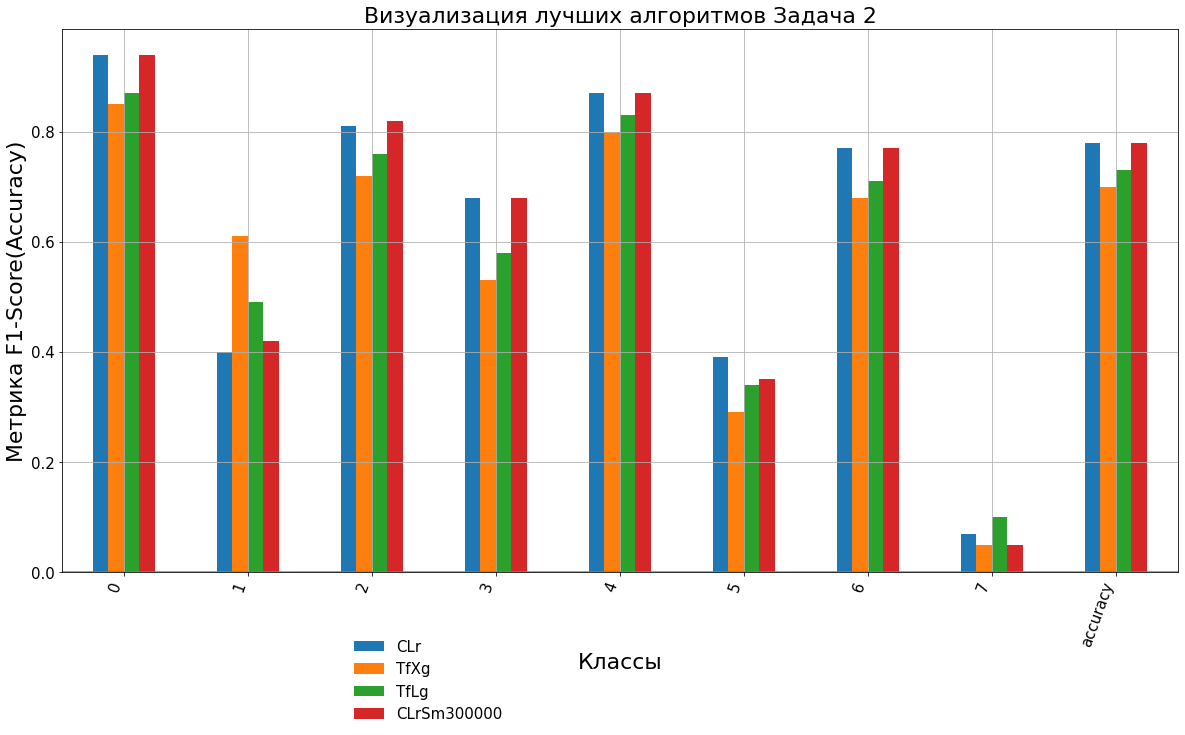

In [11]:
Metrics_2.plot(kind='bar', 
            figsize = (20,10))
plt.grid()
plt.title('Визуализация лучших алгоритмов Задача 2', fontsize=22)
plt.xlabel('Классы', fontsize=22)
plt.ylabel('Метрика F1-Score(Accuracy)', fontsize=22)
plt.gca().set_xticklabels(Metrics_2.index, rotation=70, horizontalalignment= 'right')
plt.tick_params(
    bottom=True,
    left=True,
    labelsize=15
)

plt.axhline(y=0, color='gray')
plt.legend(frameon=False,  bbox_to_anchor=(0.25, -0.3, 0.5, 0.5), prop={'size':15})
plt.show()